<a href="https://colab.research.google.com/github/manabtikadar/my_project/blob/main/YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!nvidia-smi

Sat Dec 21 07:01:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.9/112.6 GB disk)


In [27]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=check

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 911, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are {'benchmark', 'val', 'export', 'track', 'predict', 'train'}.

    Arguments received: ['yolo', 'mode=check']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'pose', 'classify', 'detect', 'segment'}
                MODE (required) is one of {'benchmark', 'val', 'export', 'track', 'predict', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with

In [28]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ToMCqFfXVwVZlxrK3vJA")
project = rf.workspace("yoloinputs").project("friends-i3hdy")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [40]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/friends-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

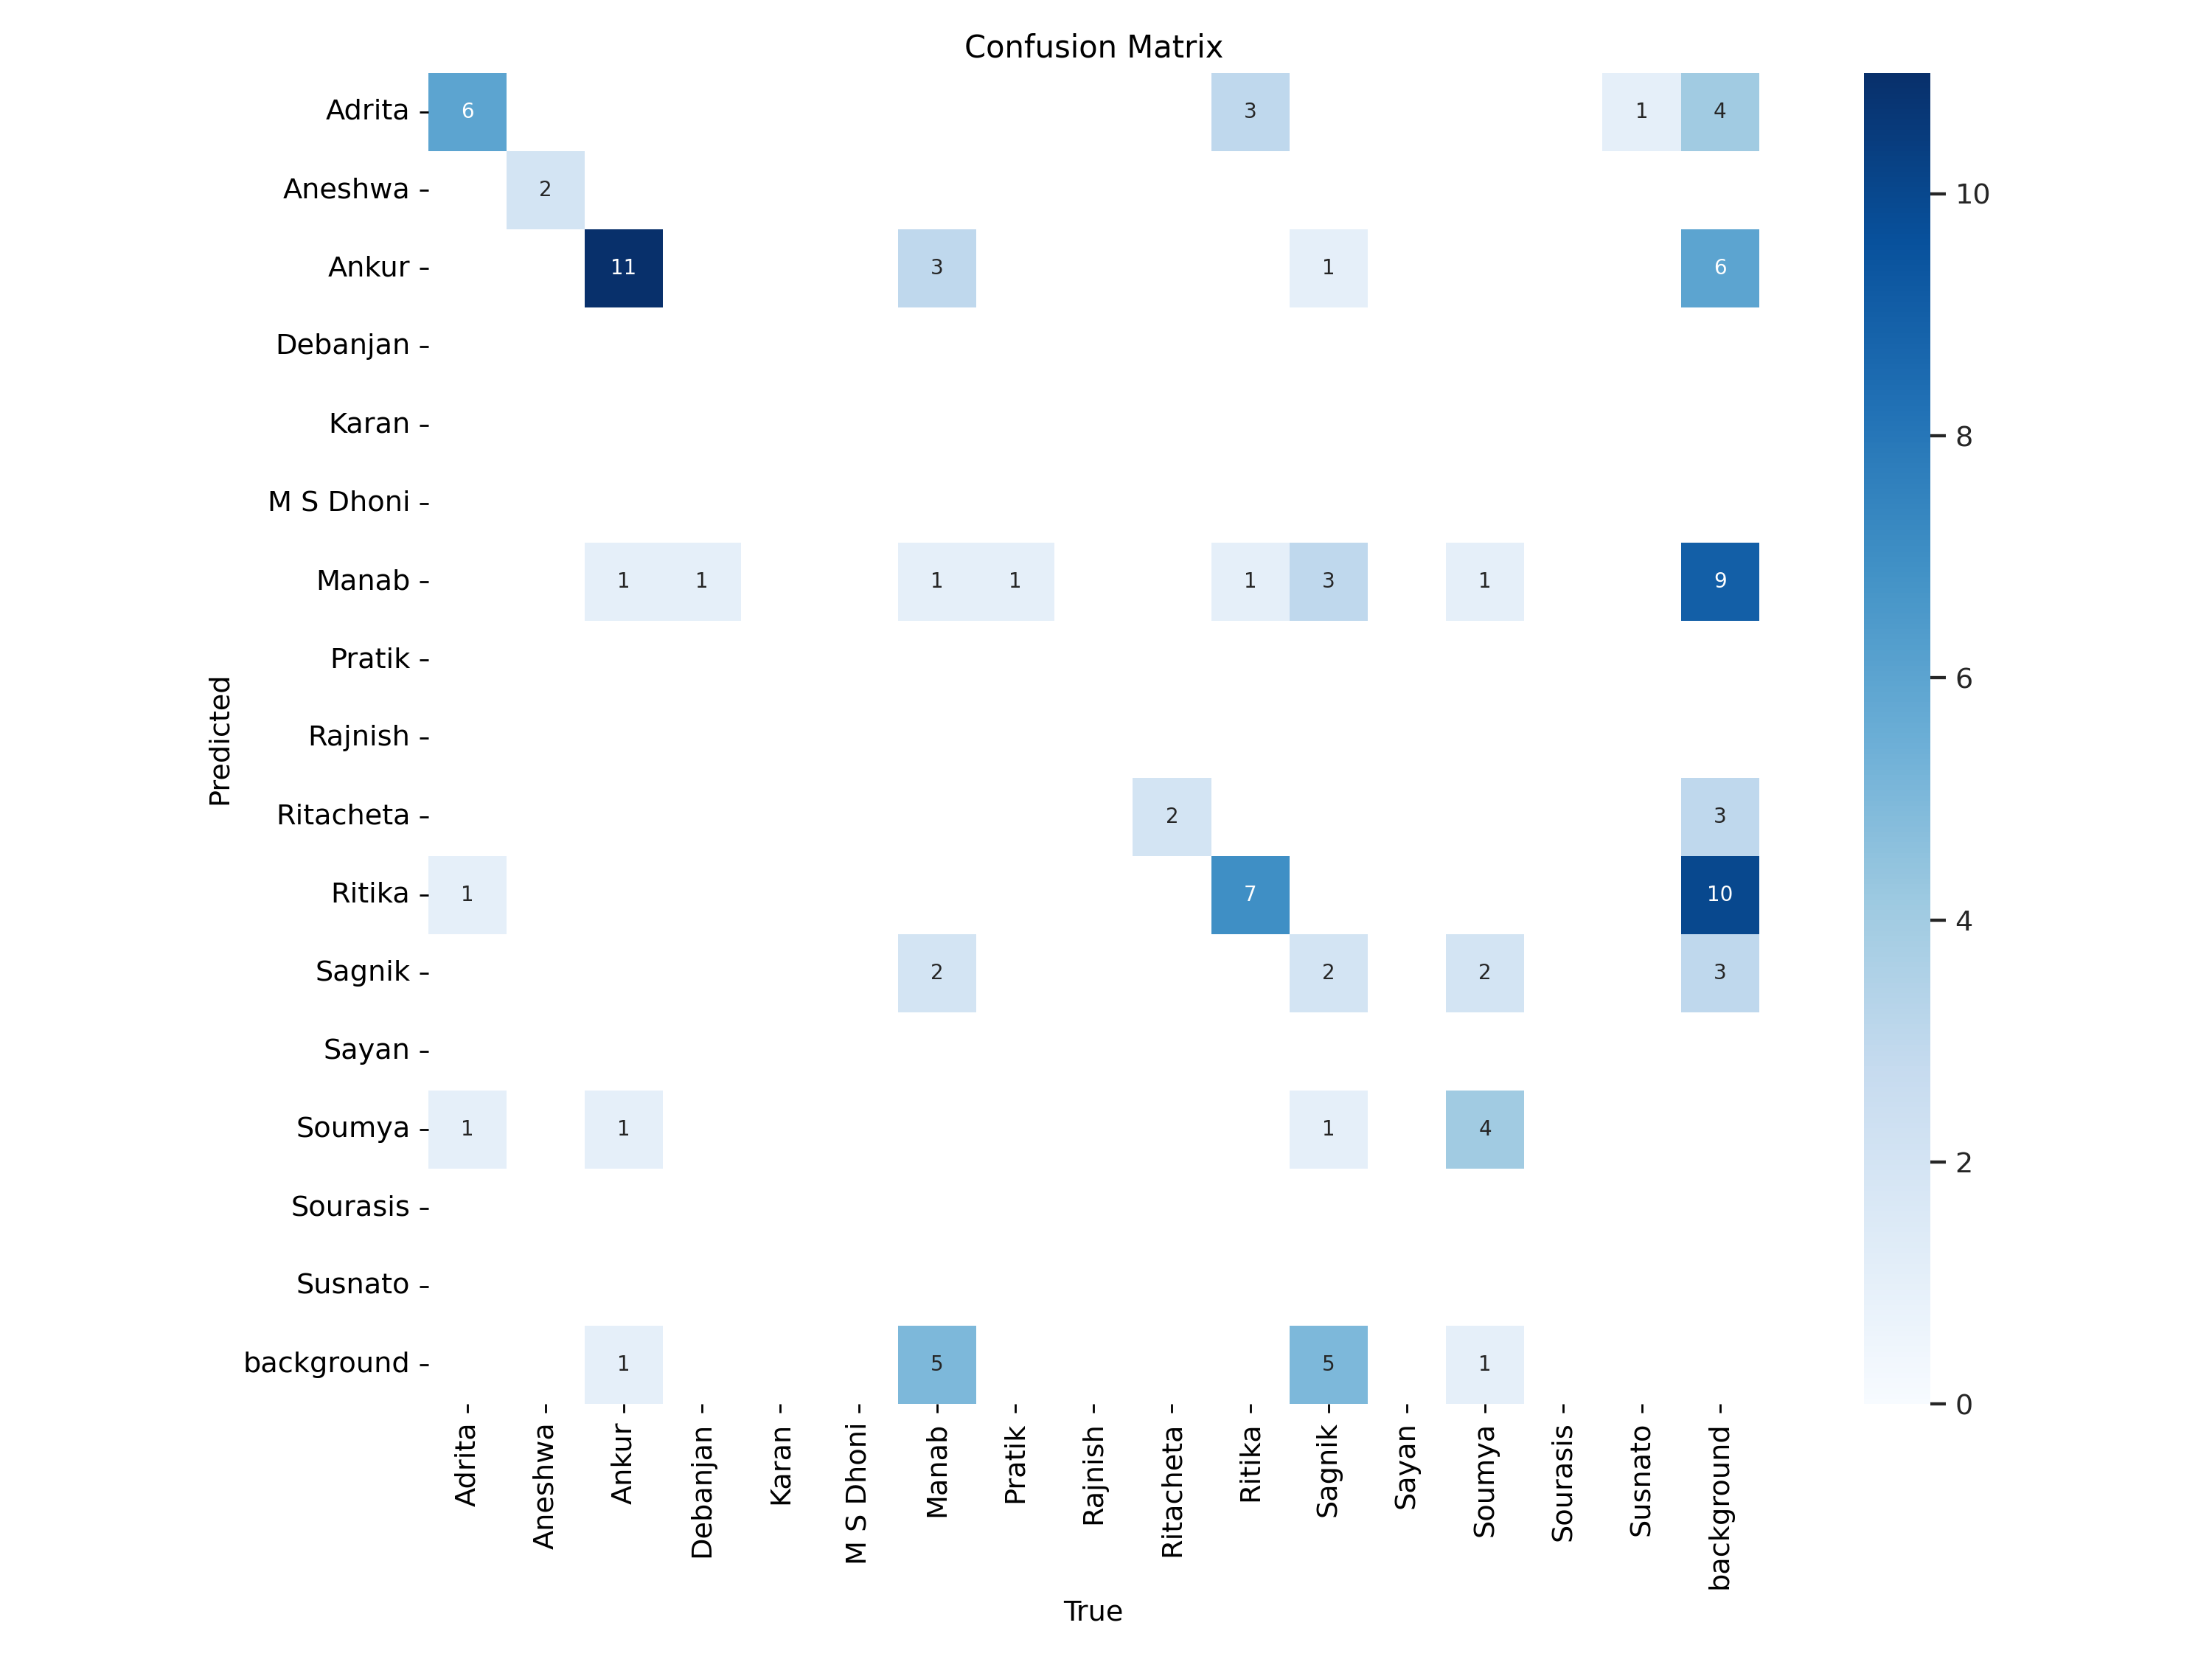

In [41]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

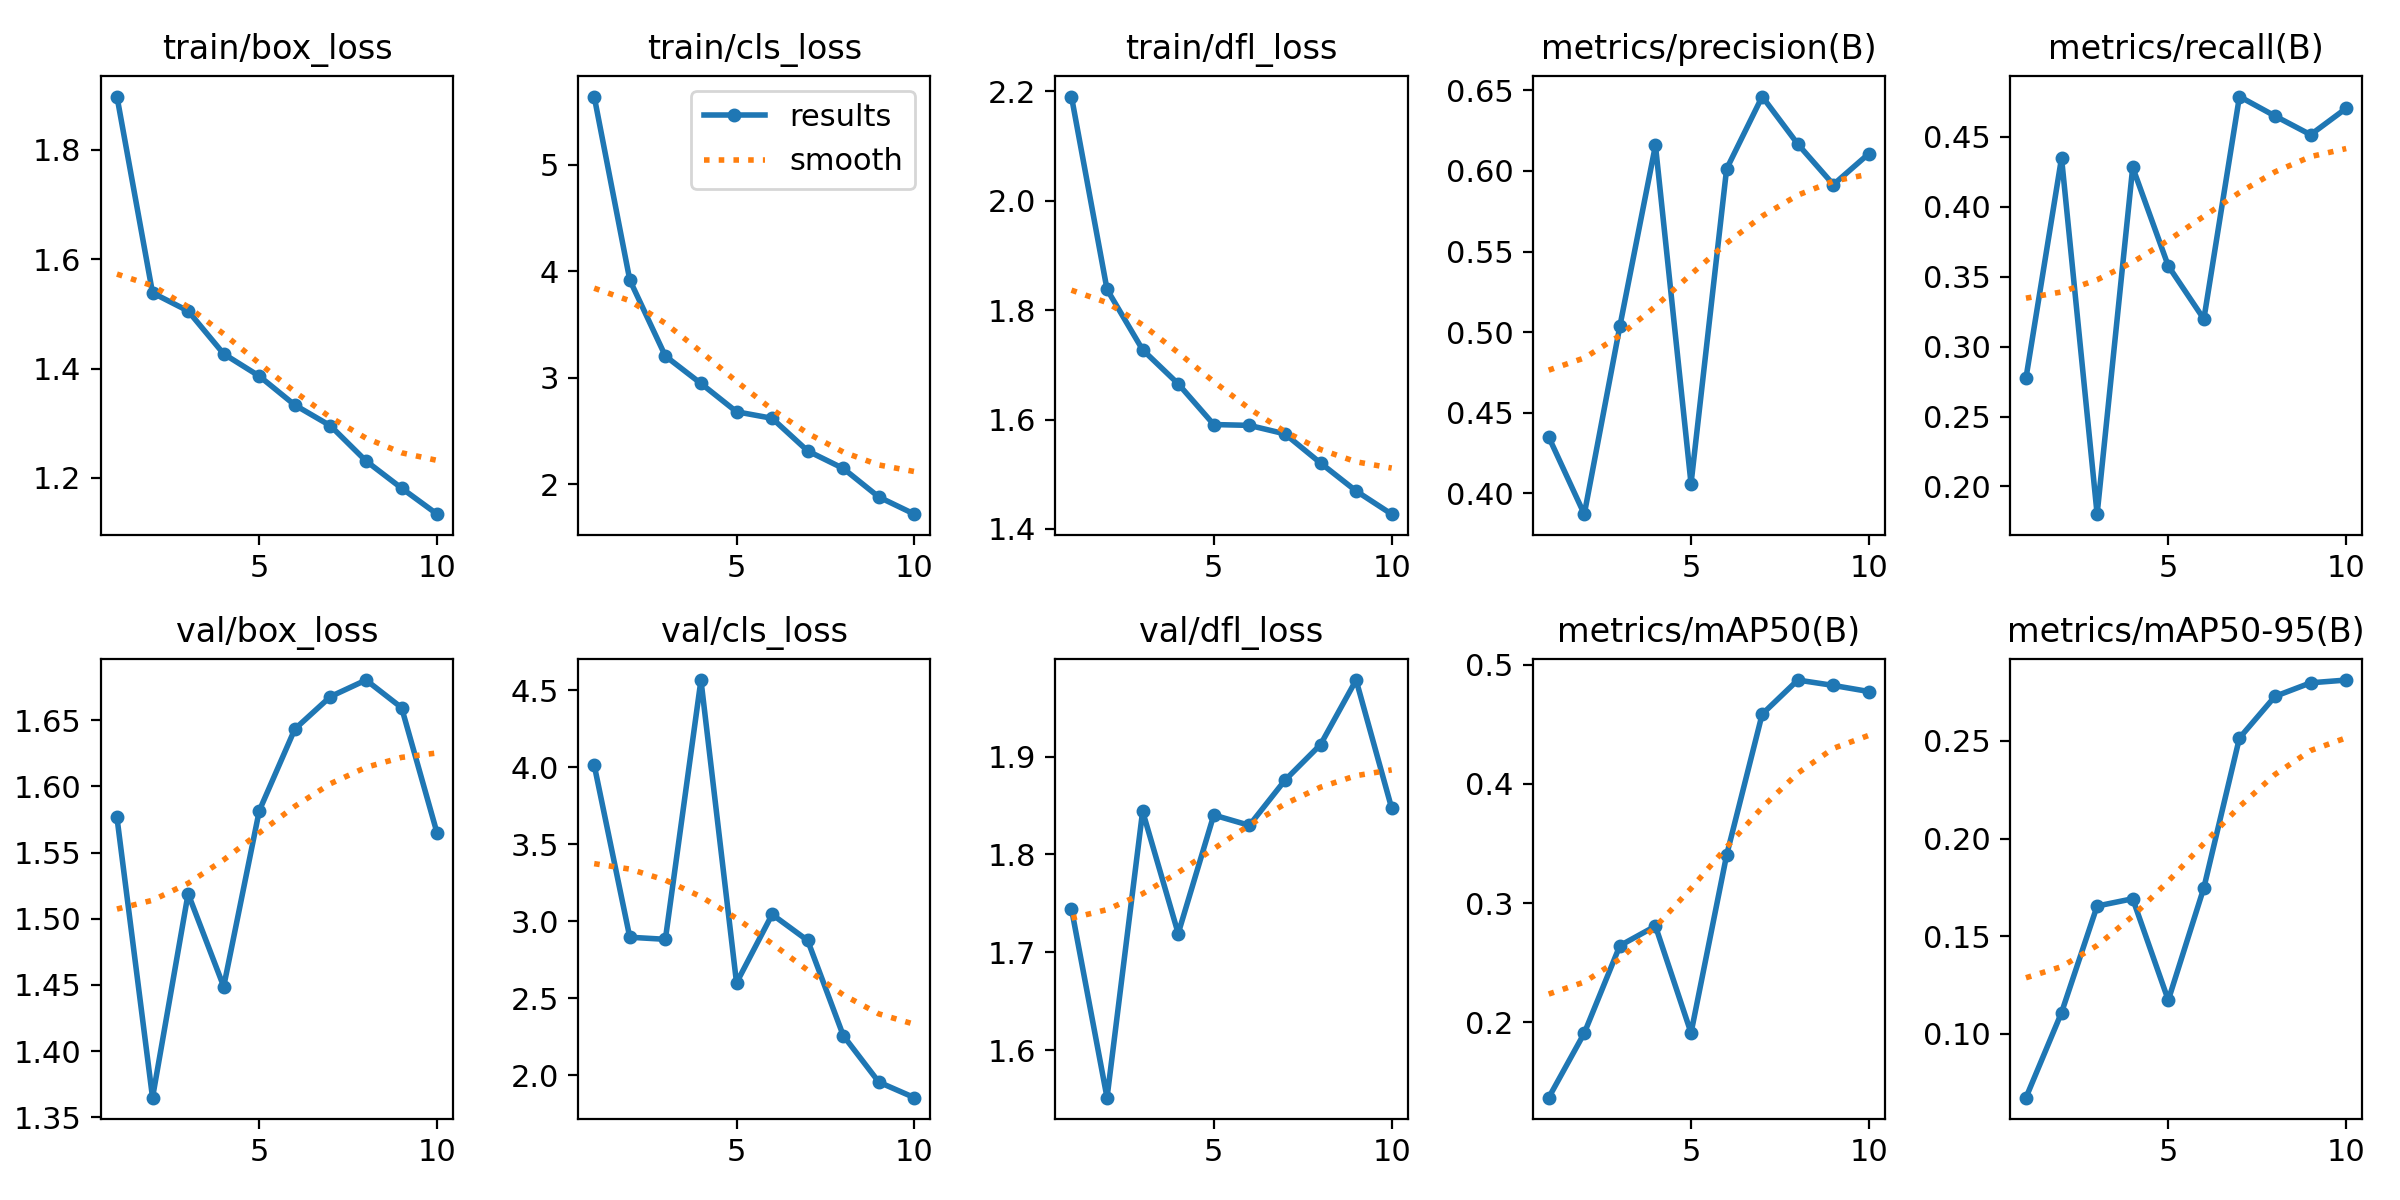

In [42]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [43]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/friends-3/valid/labels.cache... 40 images, 10 backgrounds, 0 corrupt: 100% 40/40 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.36it/s]
                   all         40         71      0.611       0.47      0.478      0.281
                Adrita          8          8      0.685      0.819      0.678      0.415
               Aneshwa          2          2      0.798          1      0.995      0.597
                 Ankur         14         14      0.738      0.857      0.869      0.516
              Debanjan          1          1          0          0          0          0
                 Manab         11         11      0.591      0.397      0.394      0.213
                Pratik          1          1          1 

In [44]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/32 /content/friends-3/test/images/20231021_212856_jpg.rf.1beaad74cd628e51cc6149c24b40dfb2.jpg: 640x640 (no detections), 36.3ms
image 2/32 /content/friends-3/test/images/20231021_212856_jpg.rf.5c5f40fee1e1ac046eaed347c367905f.jpg: 640x640 (no detections), 34.7ms
image 3/32 /content/friends-3/test/images/20231021_212856_jpg.rf.a2682c71abf5b36411b117121234950a.jpg: 640x640 (no detections), 31.0ms
image 4/32 /content/friends-3/test/images/20231021_212856_jpg.rf.a4352ed7c3ed69a2e8fc8998ea1927bc.jpg: 640x640 1 Manab, 31.0ms
image 5/32 /content/friends-3/test/images/IMG-20240623-WA0037_jpg.rf.22347c9ea5bff6ecd6893c46ba5ce146.jpg: 640x640 1 Adrita, 30.6ms
image 6/32 /content/friends-3/test/images/IMG-20240623-WA0037_jpg.rf.501fd62b983533579716bca83a85a444.jpg: 640x640 1 Sagnik, 30.5ms
image 7/32 /content/friends-3/test/ima

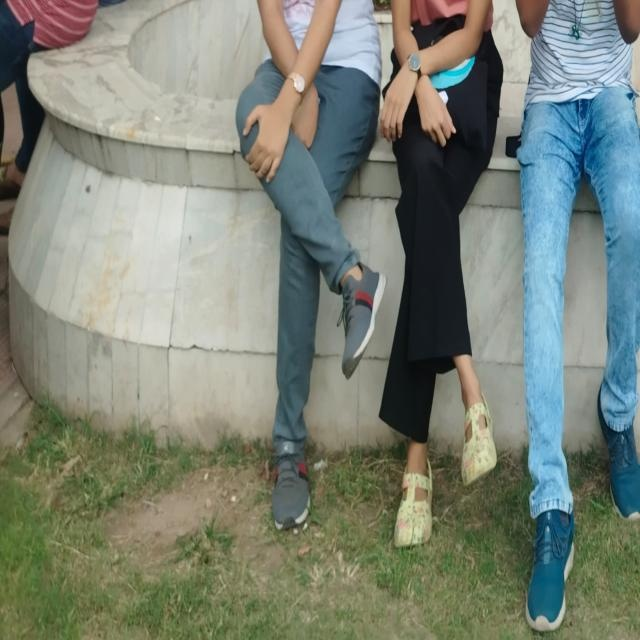

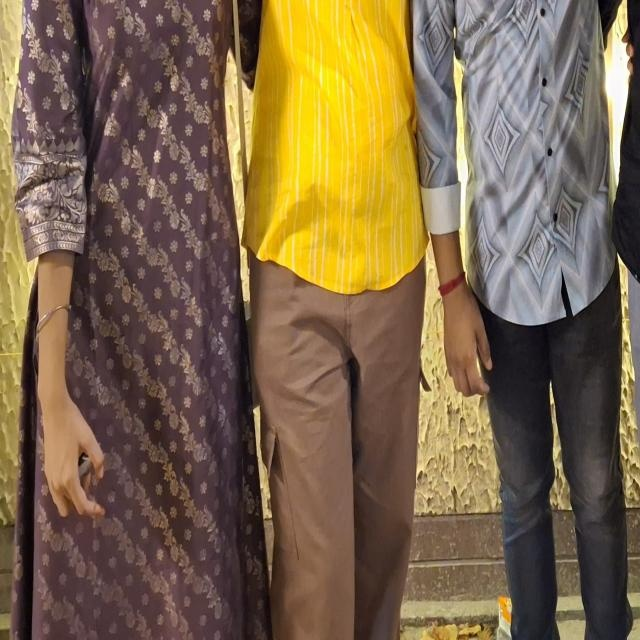

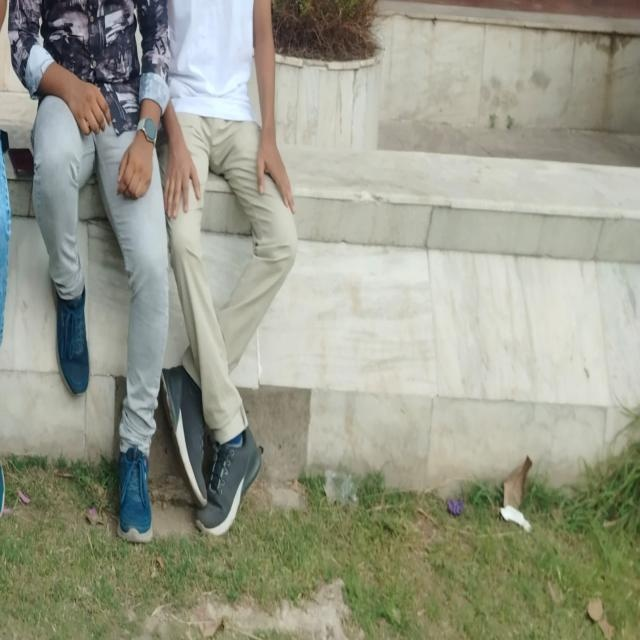

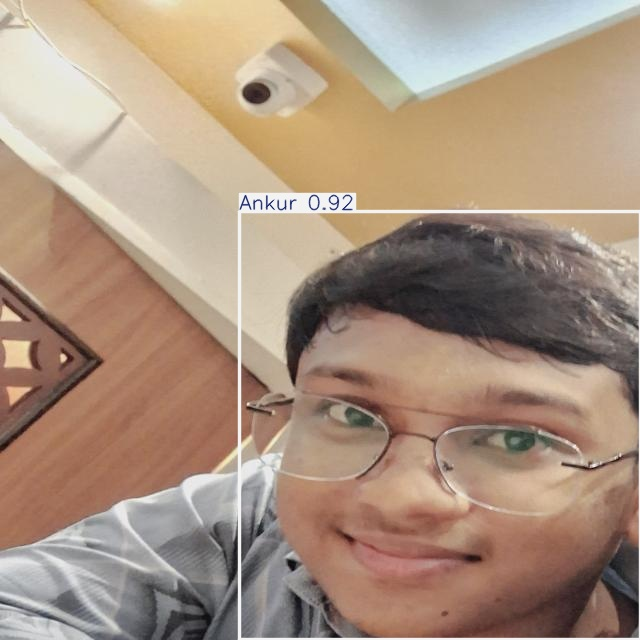

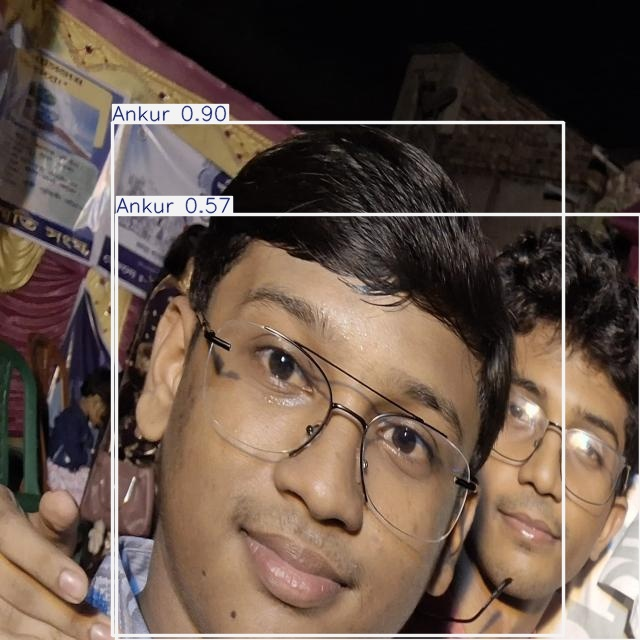

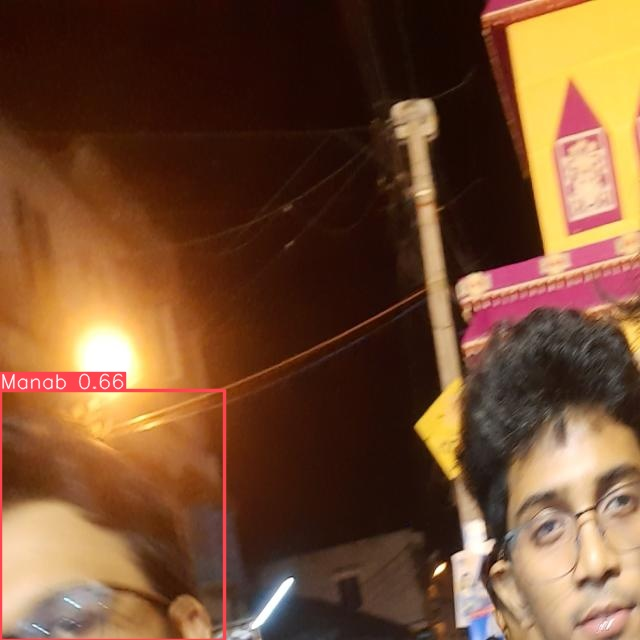

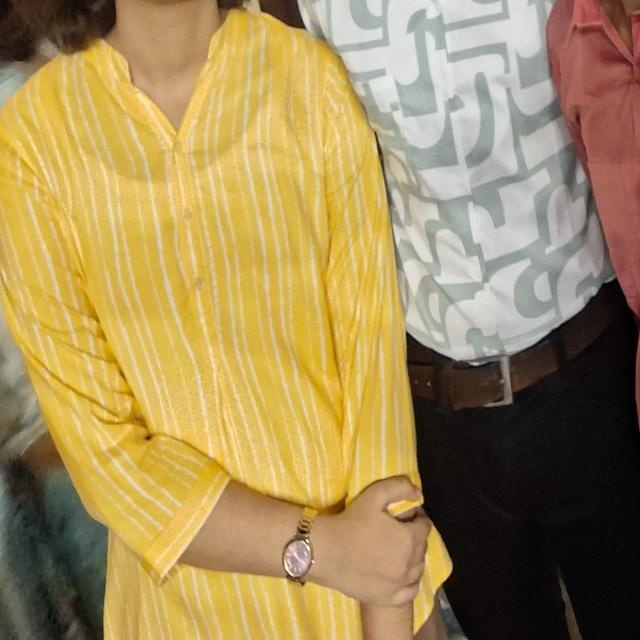

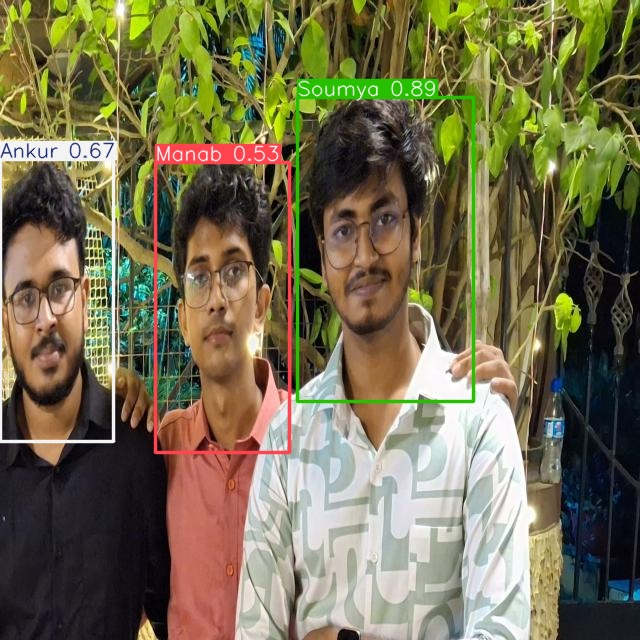

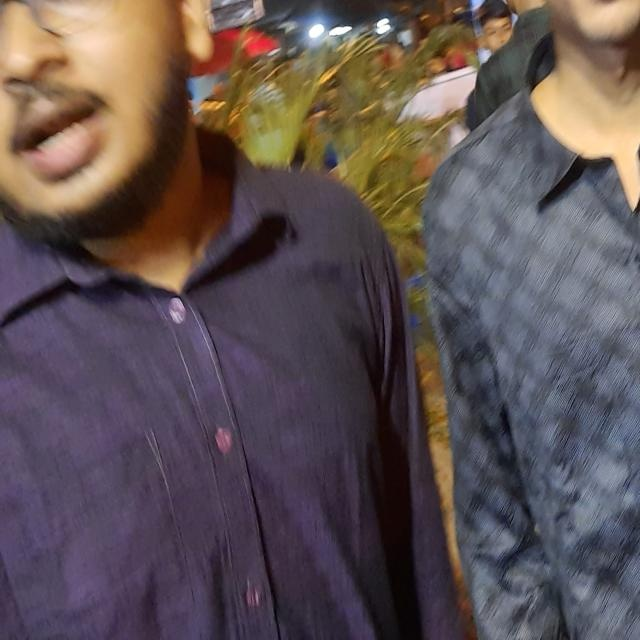

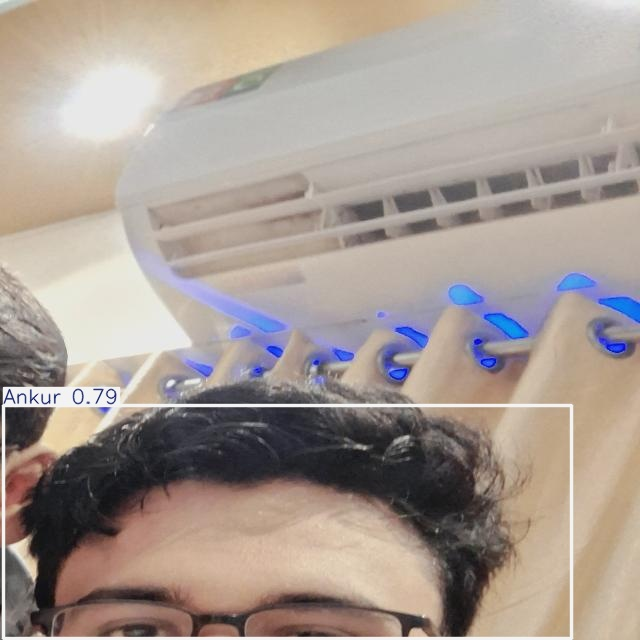

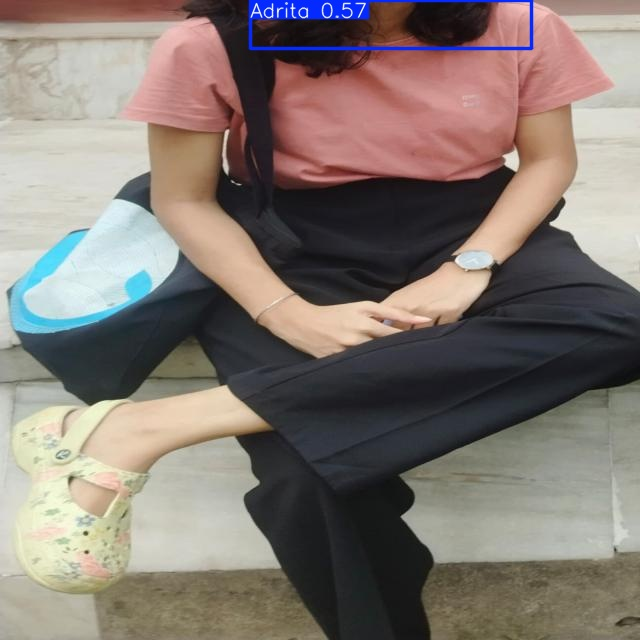

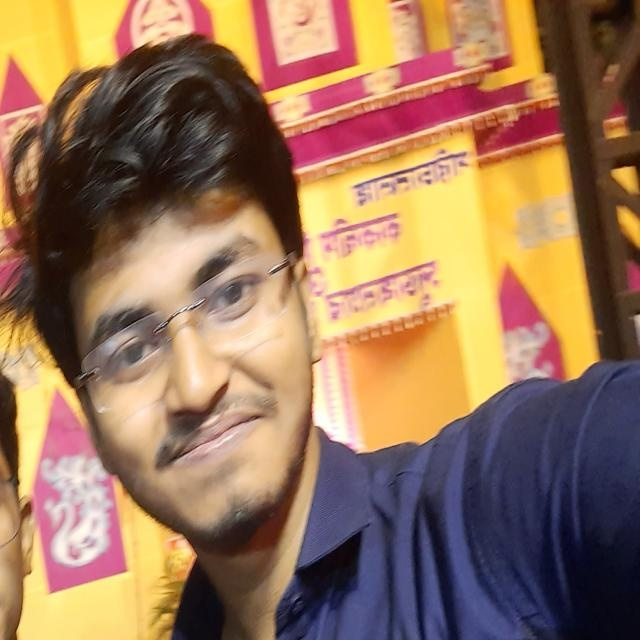

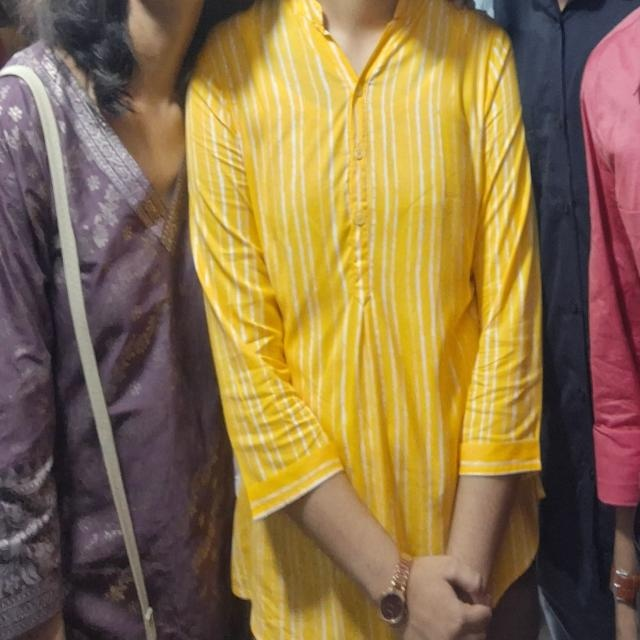

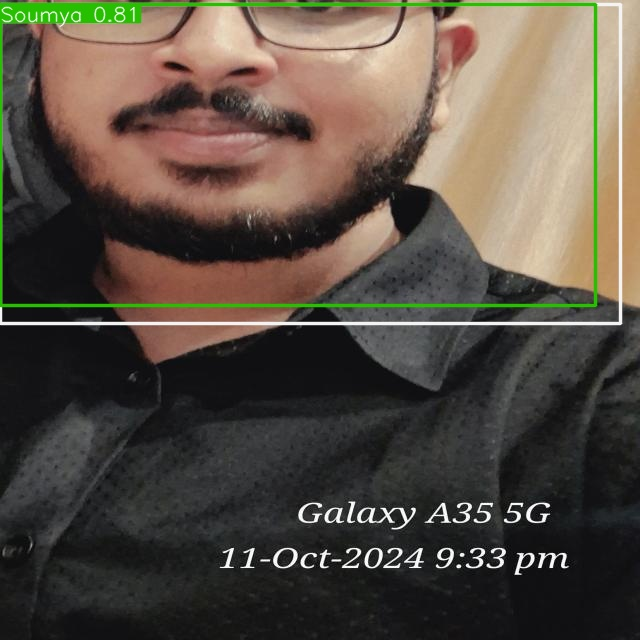

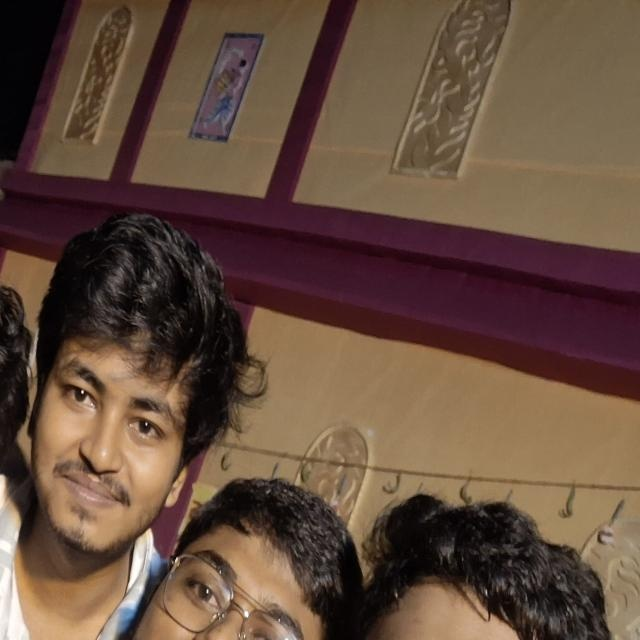

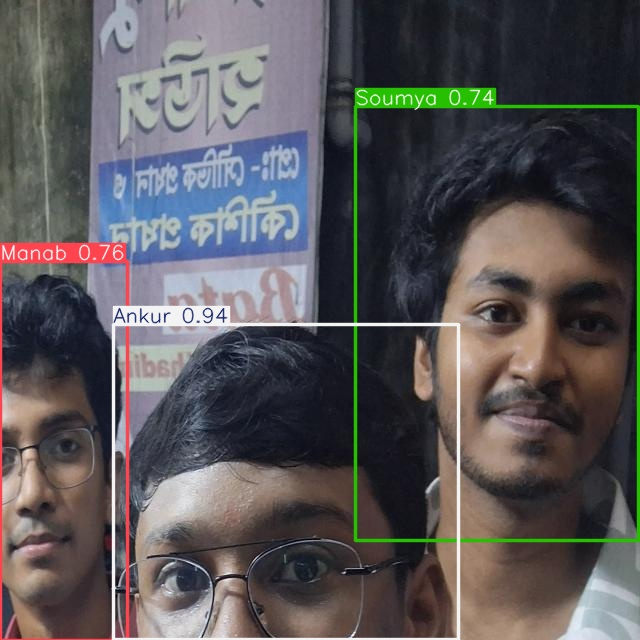

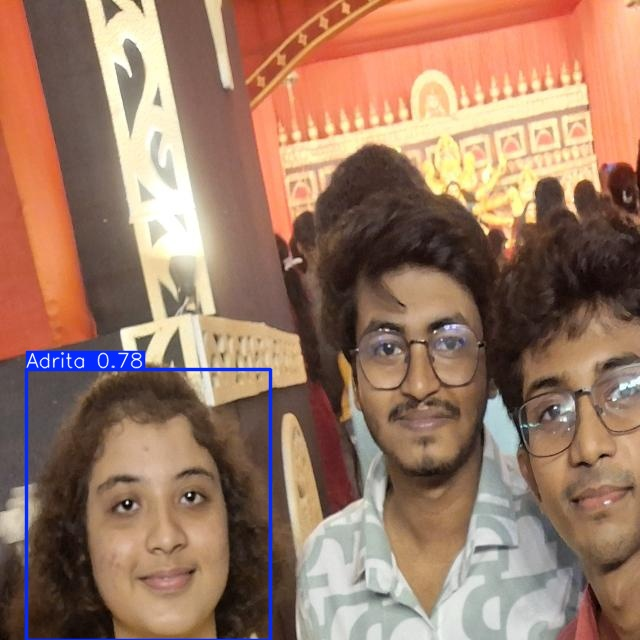

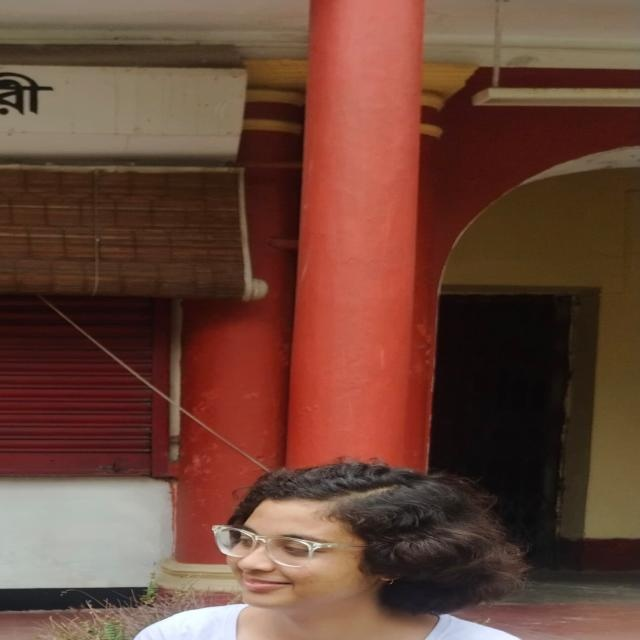

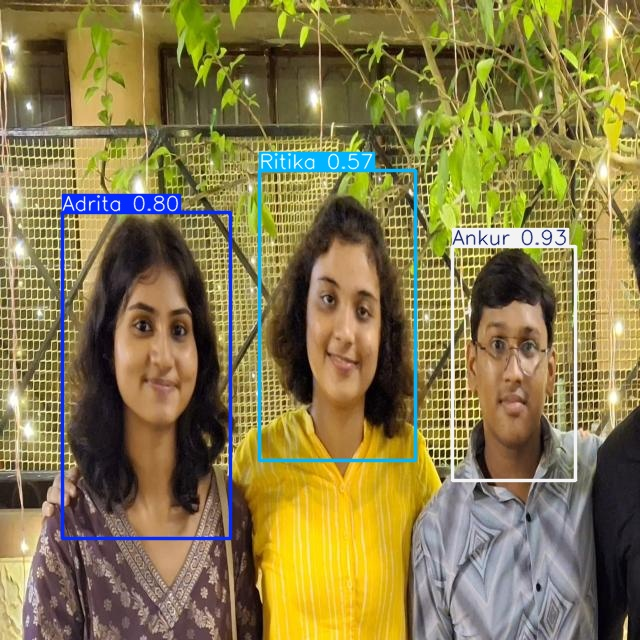

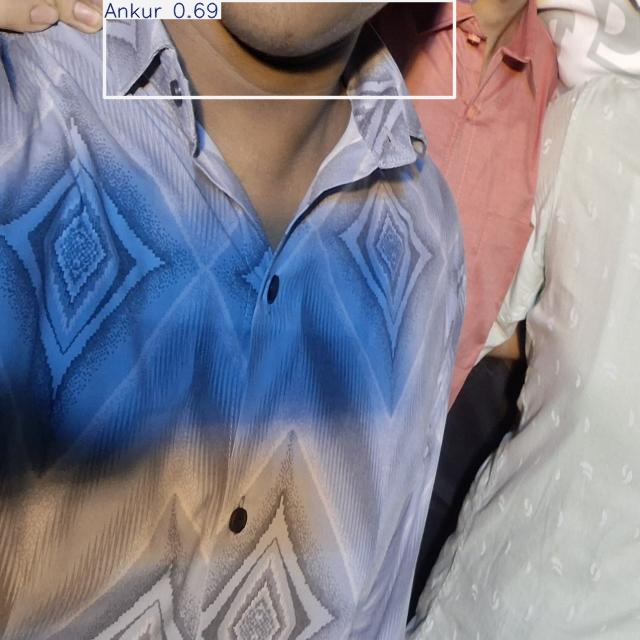

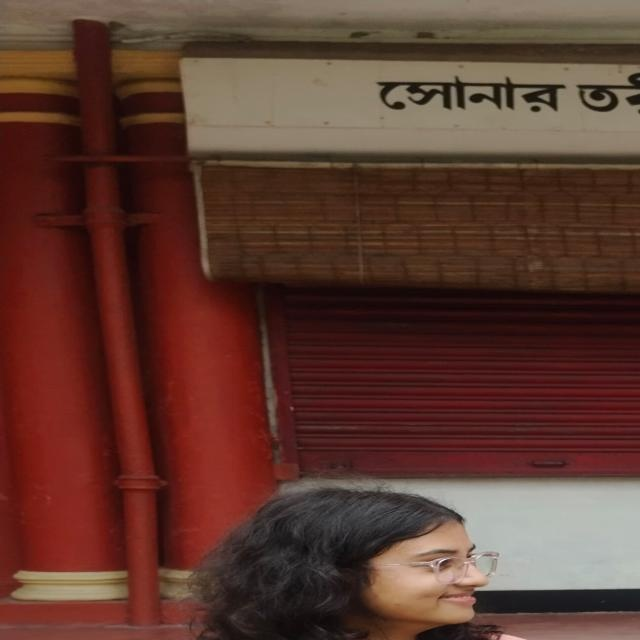

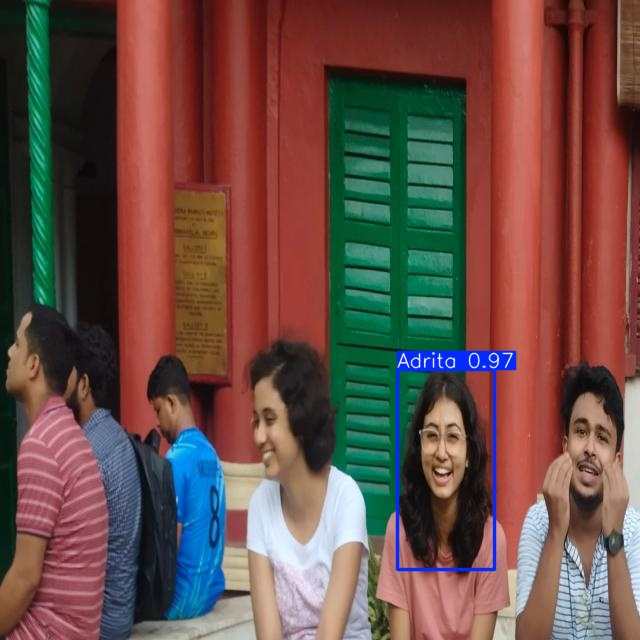

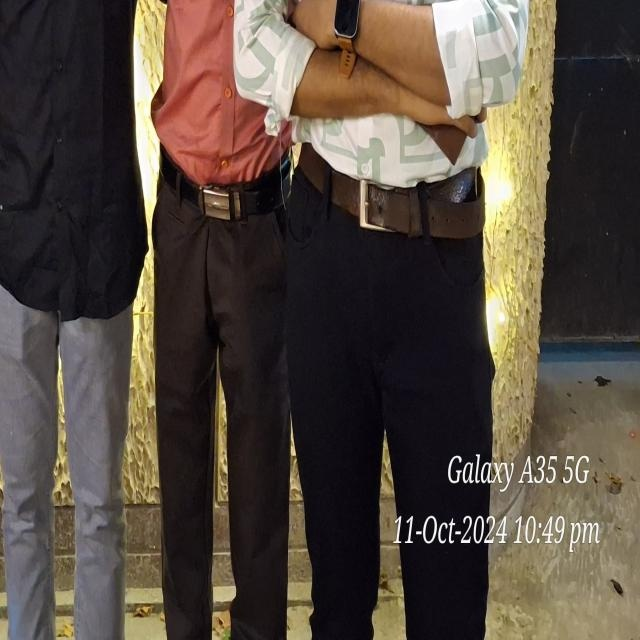

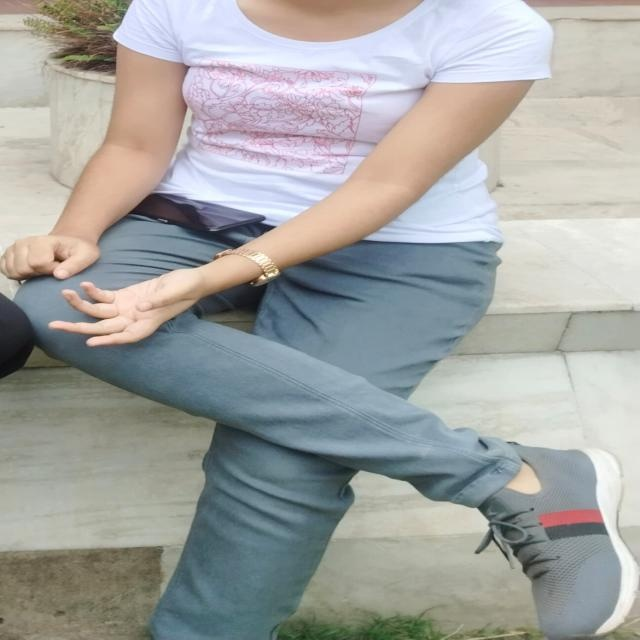

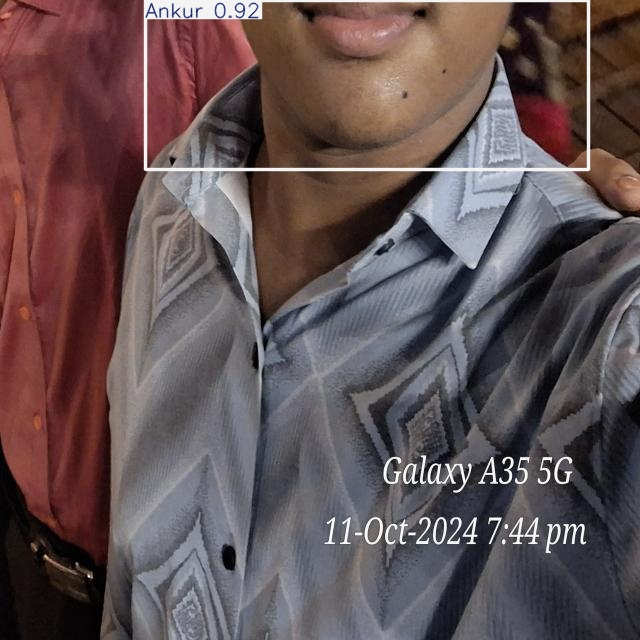

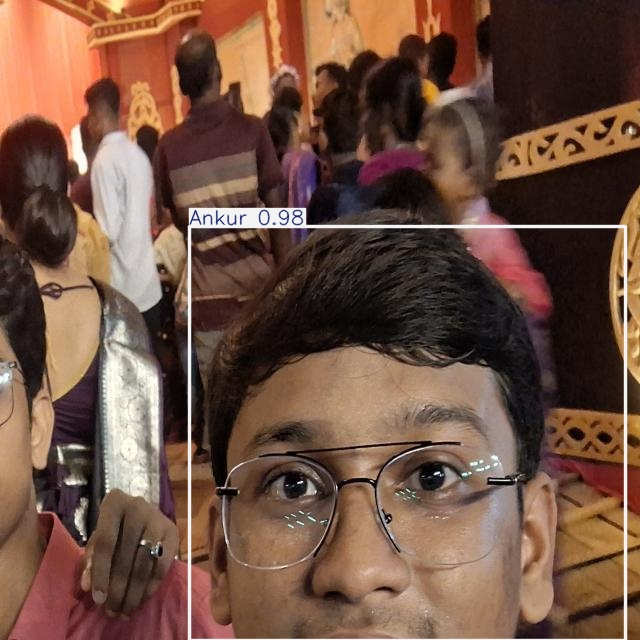

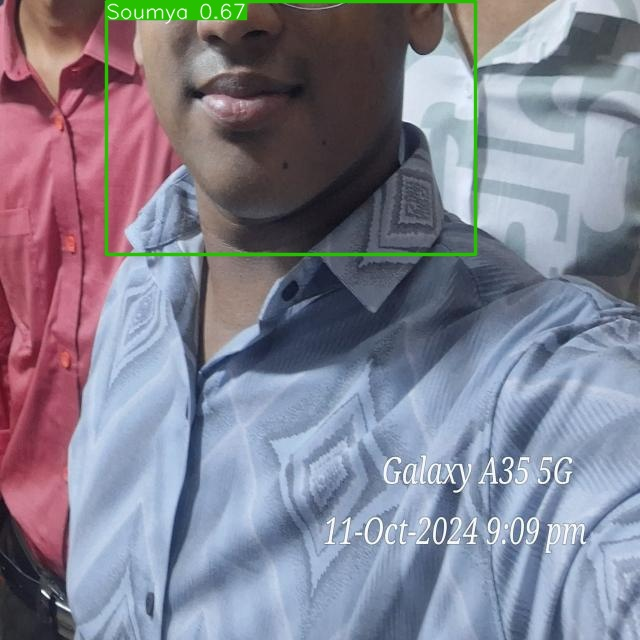

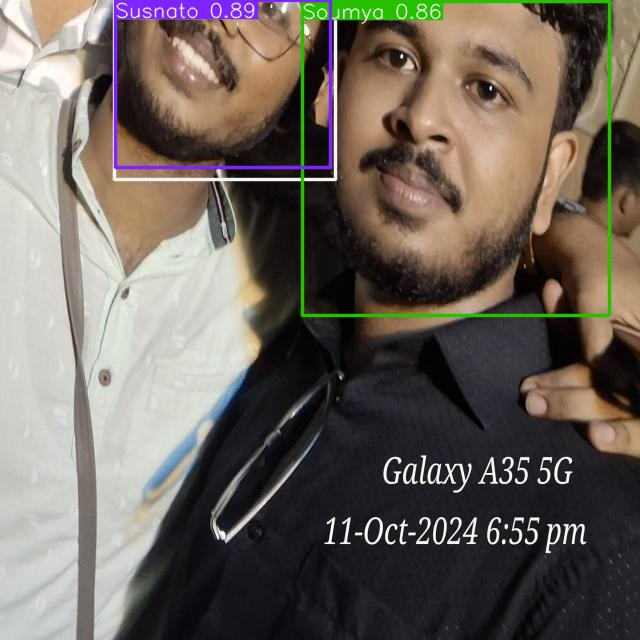

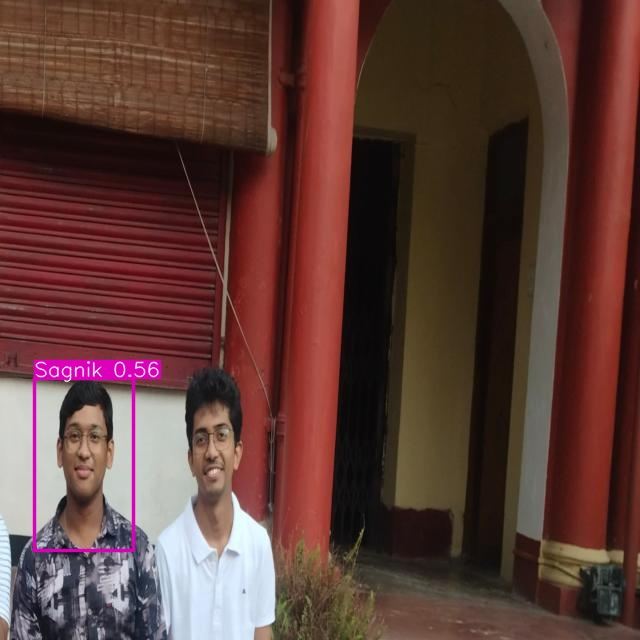

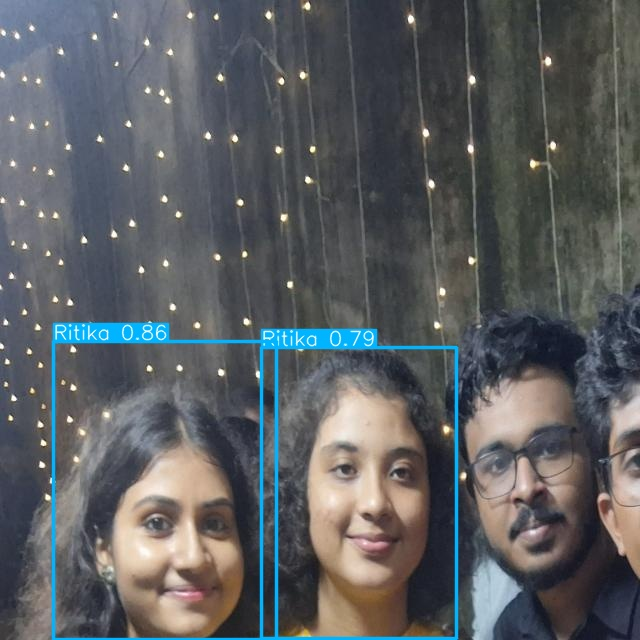

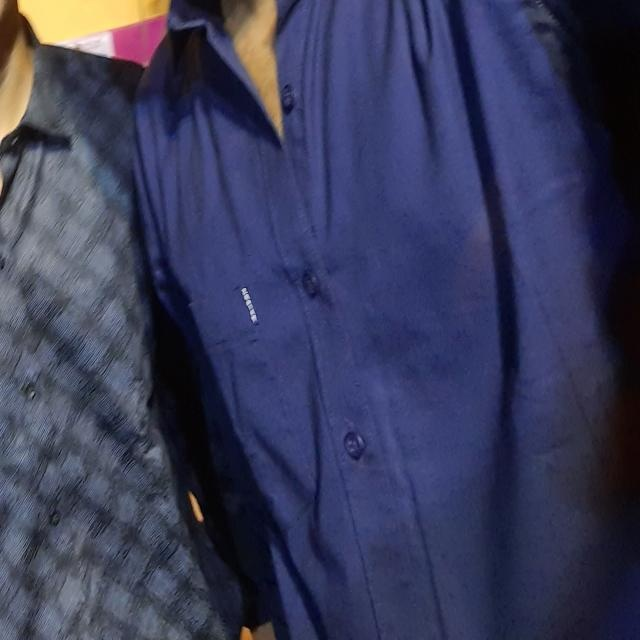

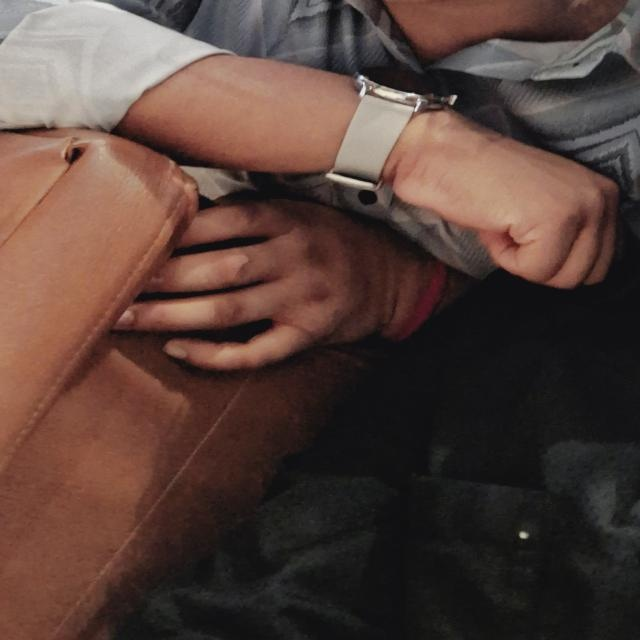

In [45]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print('\n')

In [46]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ToMCqFfXVwVZlxrK3vJA")
project = rf.workspace("yoloinputs").project("friends-i3hdy")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [47]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/adrita.jpg save=True

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/adrita.jpg: 640x448 1 Soumya, 148.9ms
Speed: 3.6ms preprocess, 148.9ms inference, 991.2ms postprocess per image at shape (1, 3, 640, 448)
Results saved to runs/detect/predict10
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [48]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source=/content/anwesha.jpg save=True

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/anwesha.jpg: 640x480 1 Adrita, 60.8ms
Speed: 2.5ms preprocess, 60.8ms inference, 656.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict11
💡 Learn more at https://docs.ultralytics.com/modes/predict


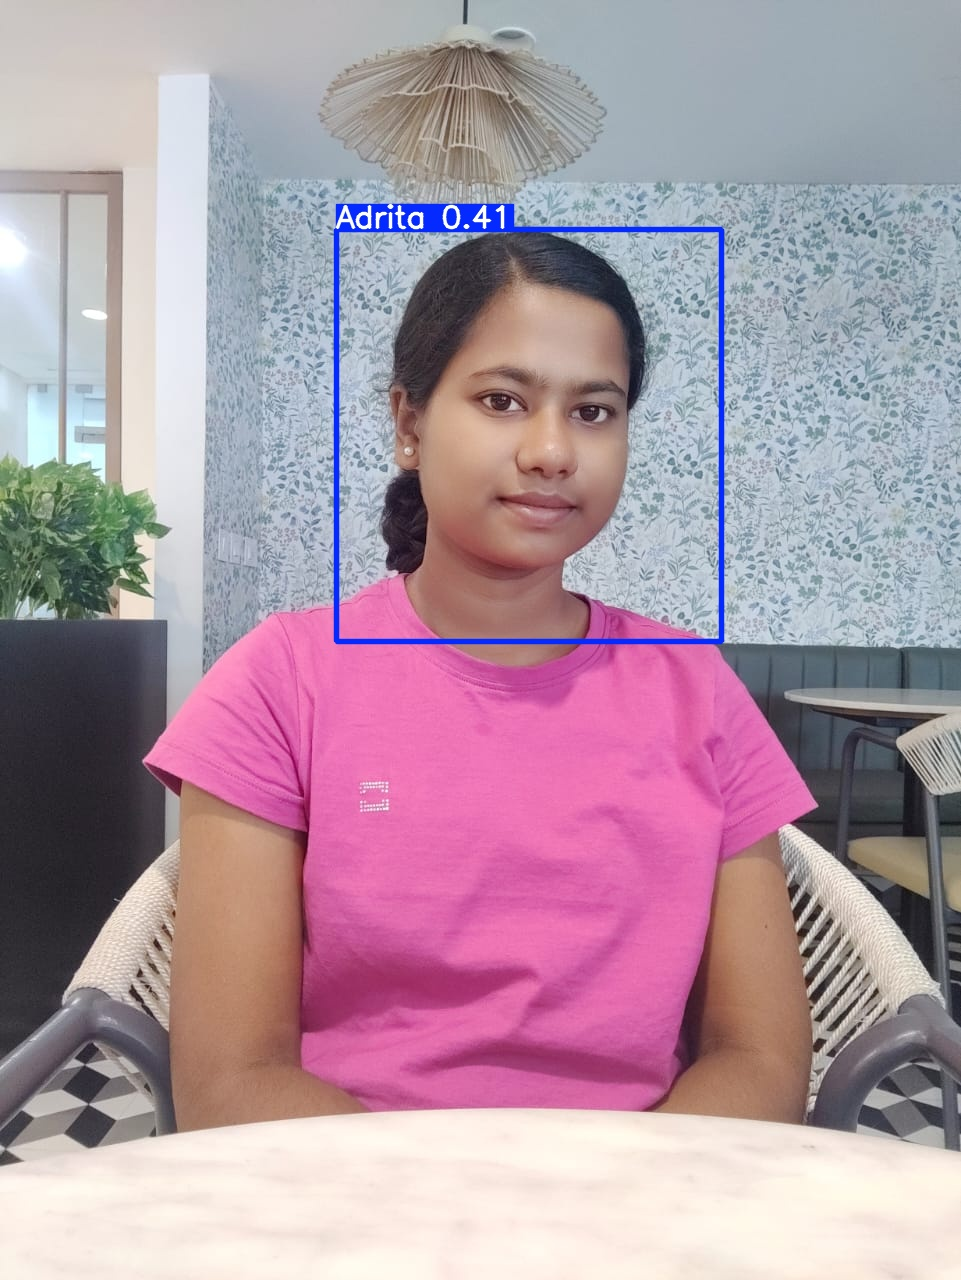

In [49]:
display(Image(filename='/content/runs/detect/predict5/anwesha.jpg', height=600))

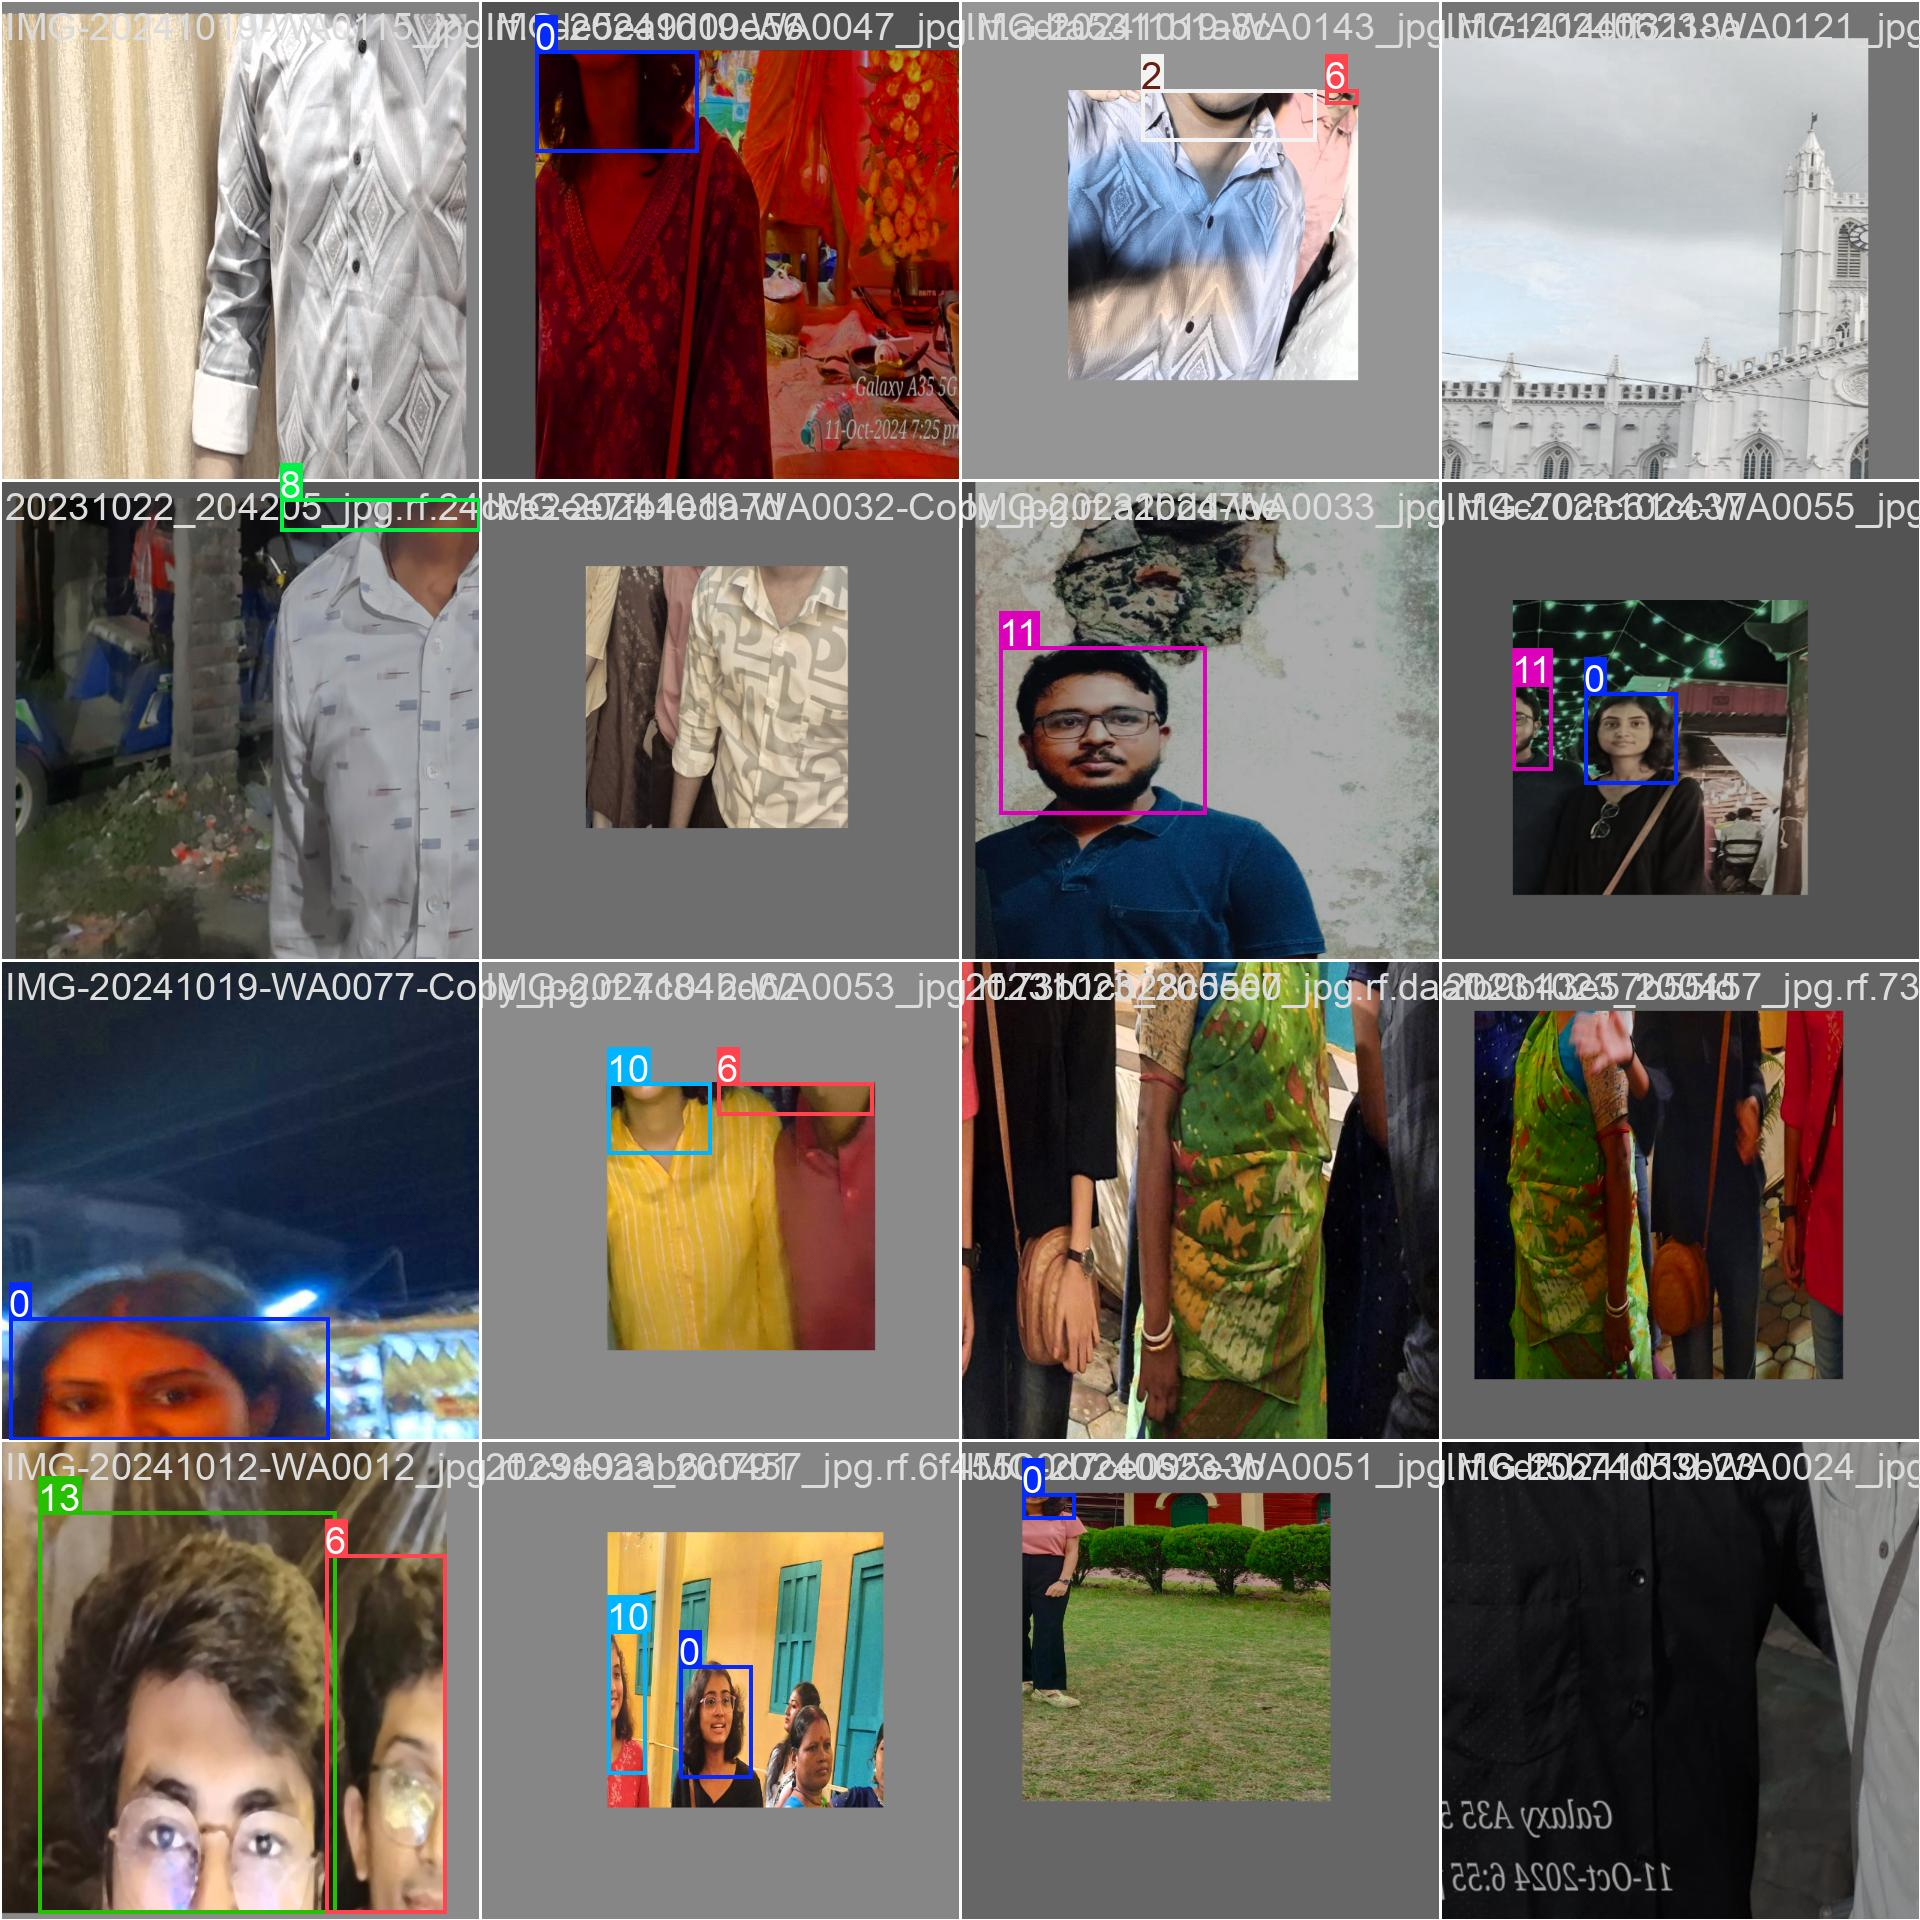

In [50]:
display(Image(filename='/content/runs/detect/train/train_batch0.jpg', height=600))

In [52]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.4 source=/content/20231023_200507.jpg save=True

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/20231023_200507.jpg: 384x640 1 Adrita, 1 Sagnik, 61.3ms
Speed: 2.5ms preprocess, 61.3ms inference, 545.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict12
💡 Learn more at https://docs.ultralytics.com/modes/predict
